# Import Libraries

In [1]:
# pip install opencv-contrib-python==3.4.2.16

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)

# ORB KeyPoint Detection:

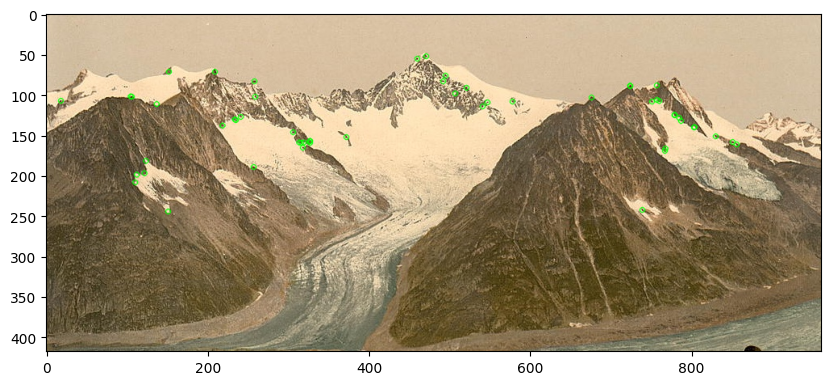

In [9]:
img = cv2.imread('data/Mountain_cropped.jpg')

scalefactor=1
img2=ResizeWithAspectRatio(img,width=int(img.shape[1]*scalefactor))
gray_img= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#----------------------------------------------------------------------------
orb = cv2.ORB_create(nfeatures = 55, scaleFactor = 1.9, nlevels = 2, edgeThreshold = 11,
                     firstLevel = 0, WTA_K = 2, scoreType = 0, patchSize = 31,
                     fastThreshold = 100 )

kp, des = orb.detectAndCompute(gray_img, None)

kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

fig= plt.figure(figsize=(10,5))
imgplot = plt.imshow(kp_img[:,:,::-1])
ORB_imageKeyPoints = np.array([list(i.pt) for i in kp])
np.savetxt('data/ORB_imageKeyPoints.out', ORB_imageKeyPoints, delimiter=',')